# Aliquot Sequences

# Group 3: Webb Hu, Nadia Gopal, Sherwin Pereira, Clara Neather

Aliquot sequences are formed by taking a positive integer $n$ and applying the function $s$ repeatedly. The function $s(n)$ finds the sum of all the proper divisors of $n$ (excluding $n$ itself). If $s^j(n) = 0$ for some $j$, the sequence terminates after $j$. This project explores the properties of different aliquot sequences, classifying them into groups based on how they end and learning more about each of the groups.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import ipywidgets as widgets

# 1. Function to calculate $s(n)$.

Firstly, we wrote a function to calculate the next term in an aliquot sequence, which for a given $n$ is its sum of divisors, $s(n)$.

In [2]:
def sum_of_divisors(n):
    '''This function returns the sum of divisors of n'''
    if n == 0 or n == 1:
        return 0                         #n=0 or n=1 should return 0 straight away because their sums of divisors are just zero
    sum = 1
    for i in range (2, ((n//2) + 1)):
        if n%i == 0:                     #For every number in the range (2,n), check if it divides n. 
            sum = sum+i                  #If the number does divide n, it's a divisor so gets added to the final sum
    return sum

In [3]:
#EXAMPLES OF SUM_OF_DIVISORS WORKING:

print("s(10) = " + str(sum_of_divisors(10)))        #10 has divisors 5,2,1 so should output 8
print("s(3869) = " + str(sum_of_divisors(3869)))    #3869=53*73 so has divisors 53,73,1 and should output 127
print("s(0) = " + str(sum_of_divisors(0)))          #Should output 0

s(10) = 8
s(3869) = 127
s(0) = 0


# 2. Computing the aliquot sequence for a given k.

This next function uses `sum_of_divisors` to calculate $t$ terms of the aliquot sequence for a given $k$, by continually applying `sum_of_divisors`.

In [4]:
def aliquot_calculator(k, t, sequence_only = False):
    '''Returns the first t terms of the aliquot sequence of k.'''
    sequence = [k]                         #Defining the new aliquot sequence, starting with k
    zero = False                           #Indicates if the sequence has terminated (we included this in the code to help with classifying sequences in later questions)
    upper_limit = False                    #Indicates if the sequence has exceeded the upper limit (we included this in the code to help with classifying sequences in later questions)
    for i in range(t-1):
        next_term = sum_of_divisors(k)     #Calculate the next term in the sequence using the sum_of_divisors function
        if next_term == 0:                 #If the next term is zero, the sequence terminates and we stop the loop
            sequence.append(next_term)
            zero = True
            break 
        if next_term > 10**9:              #We stop before reaching t terms if the terms become too big before then (bigger than 10^9)
            sequence.append(next_term)
            upper_limit = True         
            break
        sequence.append(next_term)
        k = next_term                      #Reset k to be the term just calculated and start again calculating the next term
    max_term = (i+2)==t                    #Indicates if all t terms of the sequence have been computed (we included this in the code to help with classifying sequences in later questions)
    if sequence_only:                      #If sequence_only is true, returns only the sequence. If false, returns the sequence along with the binary indicators.
        return sequence
    return [sequence, zero, max_term, upper_limit]

In [5]:
#EXAMPLES OF ALIQUOT_CALCULATOR WORKING:

#This first example should enter a loop, as it will reduce to 6 which is a perfect number
print("First 30 terms of aliquot sequence starting with 25: \n" + str(aliquot_calculator(25,30,sequence_only=True)))

#This next example should terminate early as it reaches 0
print("\nFirst 30 terms of aliquot sequence starting with 40: \n" + str(aliquot_calculator(40,30,sequence_only=True)))

#This final example won't have finished/reached a pattern when it's cut off after 30 terms
print("\nFirst 30 terms of aliquot sequence starting with 150: \n" + str(aliquot_calculator(150,30,sequence_only=True)))

First 30 terms of aliquot sequence starting with 25: 
[25, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

First 30 terms of aliquot sequence starting with 40: 
[40, 50, 43, 1, 0]

First 30 terms of aliquot sequence starting with 150: 
[150, 222, 234, 312, 528, 960, 2088, 3762, 5598, 6570, 10746, 13254, 13830, 19434, 20886, 21606, 25098, 26742, 26754, 40446, 63234, 77406, 110754, 171486, 253458, 295740, 647748, 1077612, 1467588, 1956812]


# 3. Loop detection.

We now define a function which will check if a given sequence contains a loop.

In [6]:
def loop_checker(sequence):
    '''This function checks if a given aliquot sequence contains loops.'''
    value_set = set(sequence)               #Set of all values in sequence
    if len(value_set)< len(sequence):       #If value set contains fewer elements than the sequence there must have been a loop
        return True
    return False

In [7]:
#EXAMPLES OF LOOP_CHECKER WORKING:

#From the previous example, we know that 25 will loop but 40 and 150 won't (within 30 terms). 
#Let's check these values:
print("Loops contained in the aliquot sequence starting with 25: " + str(loop_checker((aliquot_calculator(25,30,sequence_only=True)))))
print("Loops contained in the aliquot sequence starting with 40: " + str(loop_checker((aliquot_calculator(40,30,sequence_only=True)))))
print("Loops contained in the aliquot sequence starting with 150: " + str(loop_checker((aliquot_calculator(150,30,sequence_only=True)))))

Loops contained in the aliquot sequence starting with 25: True
Loops contained in the aliquot sequence starting with 40: False
Loops contained in the aliquot sequence starting with 150: False


# 4. Classifying aliquot sequences for each k < 20000.

We decided to create a function that would classify sequences by assigning them into one of 4 groups (`sequence_classifier`), and then one that puts the sequences into lists based on the group number they were assigned (`number_tester`). 

In [8]:
def sequence_classifier(sequence_data):
    '''Classifies an aliquot sequence.'''
    #Sequence_data contains the aliquot sequence of a number along with the binary indicators from aliquot calculator
    #Format of sequence_data = [sequence, zero, max_terms, upper_limit]
    if sequence_data[1]:                   #Sequences that terminate (group 0)
        return 0
    elif loop_checker(sequence_data[0]):   #Sequences that loop (group 1)
        return 1    
    elif sequence_data[3]:                 #Sequences that exceed ceiling, inconclusive (group 3)
        return 3
    elif sequence_data[2]:                 #All t terms have been computed, inconclusive (group 2)
        return 2

def number_tester(k, t):
    '''Classifies the aliquot sequences of t terms for integers in the range 0 to k-1.'''
    classification = [[],[],[],[]]
    for i in range(k):
        type = sequence_classifier(aliquot_calculator(i,t))     #Classify each sequence
        classification[type].append(i)                          #Add the classified sequence to the appropriate list
    return classification                                       #Returns a list of 4 lists, each containing the sequences classified into that group

In [9]:
#EXAMPLES OF SEQUENCE_CLASSIFIER WORKING:

#Let's again use our previous examples - we know that 25 loops, 40 should reach zero and 150 will just be cut off after 31 terms
print("25 is in group " + str(sequence_classifier(aliquot_calculator(25,30))))
print("40 is in group " + str(sequence_classifier(aliquot_calculator(40,30))))
print("150 is in group " + str(sequence_classifier(aliquot_calculator(150,30))))

25 is in group 1
40 is in group 0
150 is in group 2


In [10]:
#EXAMPLES OF NUMBER_TESTER WORKING:

#Let's look at what happens to the first 100 numbers with 30 terms of their aliquot sequences
print("\nGroup 0 (sequence that terminates): \n" + str(number_tester(100,30)[0]))
print("\nGroup 1 (sequence that loops): \n" + str(number_tester(100,30)[1]))
print("\nGroup 2 (sequence that hits the large number ceiling): \n" + str(number_tester(100,30)[2]))
print("\nGroup 3 (sequence that diverges locally (inconclusive)): \n" + str(number_tester(100,30)[3]))


Group 0 (sequence that terminates): 
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99]

Group 1 (sequence that loops): 
[6, 25, 28, 95]

Group 2 (sequence that hits the large number ceiling): 
[]

Group 3 (sequence that diverges locally (inconclusive)): 
[]


However, when we tried to run this code for $k=20000$, it was taking an extremely long time! So we rewrote our code to make it more efficient in part 5 below.

# 5. Optimisation using the multiplicative property.

We decided to take advantage of the fact that the sum of all divisors, $\sigma(n)$, is multiplicative, and wrote a function to calculate $\sigma(n)$ for $n = p^{e}$ for $p$ prime and $e \in \mathbb{Z}^+$.
Since $$\sigma(p^{e}) = \sum_{r = 0}^e p^{r}$$
we can compute $\sigma(p^{e})$ as the sum of a geometric sequence, $\frac{a(r^{n}-1)}{r-1}$.
In order to apply this to any $n \in \mathbb{Z}^+$, we used a function that returns the prime decomposition of $n$, `decompose`, and a function that returns the associated function defined on $\mathbb{Z}^+$, `make_mult_func`.

In [11]:
def sum_of_divisors_prime(p, k):
    """Calculates the sum of all divisors of p^k """
    # Makes use of the fact that the divisors form a geometric sequence
    return ((p**(k+1))-1)/(p-1) 

def smallest_factor(n):
    """Returns the smallest factor of a positive integer n."""
    sqrt=n**0.5
    i=2
    while i<=sqrt:                              #Iterates over all integers less than sqrt(n)
        if n%i==0:
            return i                            #If i divides n, return i as the value.
        i+=1                                    #Otherwise add 1 to i and try again
    return n  

def decompose(n):
    """Generates a dictionary representing the prime decomposition of a positive integer n."""
    factors={}                                  #Define a dictionary to write primes and their indices to
    current_number=n                            #Define a variable containing N that can be modified
    while current_number > 1:                   #We will divide current_number by the factor found found until it reaches 1 (then it's fully factorised)
        p=smallest_factor(current_number)       #Set p to be the new smallest factor of current_number
        if p in factors.keys():                
            factors[p]+=1                       #If p is not a new factor, increase the power
        else:
            factors[p]=1                        #If p is a new factor, create a new entry
        current_number = current_number//p      #Divide current_number by the current p
    return factors

def make_mult_func(fun_pp):
    """
    Takes a function fun_pp that is only defined on prime power and returns the associated
    multiplicative function defined on all positive integers.
    The associated function calculates the result for all prime power factors of n and 
    returns their product.
    """
    def mult_version(n):                        #The output should be another function -- this one
        n=decompose(n)
        result=1
        for p in n.keys():
            result*=fun_pp(p,n[p])              #Uses the value at a prime power
        return result
    return mult_version                         #Return the function made

Using this alternative method we were able to write alternative versions of our previous functions with substantial improvements in speed for larger upper bounds; in testing, we found time to be reduced by three orders of magnitude.

In [12]:
def sum_of_divisors_fast(n):
    '''This function returns the sum of divisors of n'''
    if n == 0:
        return 0                                       #Separate case for n=0 (sum of divisors is just 0)                          
    s = make_mult_func(sum_of_divisors_prime)(n) - n   #We need to take away the extra n as s(n) is not multiplictive itself, but related to a multiplicative function (calculating s(n) you don't include n itself)
    return s

def aliquot_calculator_fast(k, t, sequence_only = False):
    '''Returns the first t terms of the aliquot sequence of k.'''
    sequence = [k]                              #Defining the new aliquot sequence, starting with k
    zero = False                                #Indicates if the sequence has terminated 
    upper_limit = False                         #Indicates if the sequence has exceeded the upper limit
    for i in range(t-1):
        next_term = sum_of_divisors_fast(k)     #Calculates the next term using the sum_of_divisors_fast function
        if next_term == 0:                      #If the next term is zero, the sequence terminates and we stop the loop
            sequence.append(next_term)
            zero = True
            break 
        if next_term > 10**9:                   #We stop before reaching t terms if the terms become too big before then (bigger than 10^9)
            sequence.append(next_term)
            upper_limit = True
            break
        sequence.append(next_term)
        k = next_term                           #Reset k to be the term just calculated and start again calculating the next term
    max_term = (i+2)==t                         #Indicates if all t terms of the sequence have been computed
    if sequence_only:                           #If true, returns only the sequence. If false, returns the sequence along with the binary indicators.
        return sequence
    return [sequence, zero, max_term, upper_limit]

def number_tester_fast(k, t):
    '''Classifies the aliquot sequences of t terms for integers 0 till k-1.'''
    classification = [[],[],[],[]]
    for i in range(k):
        type= sequence_classifier(aliquot_calculator_fast(i,t))  #Classify the sequence
        classification[type].append(i)                           #Add the classified sequence to the appropriate list
    return classification                                        #Returns 4 lists, each containing the sequences classified into that group

We can now compare the new faster function to the old one. It is clear that the new code is much more efficient.

In [13]:
#Comparing new function to old function with test values k=500, t=30

start0 = time.time()
number_tester_fast_result = number_tester_fast(500,30)
print("Time taken for new fast function: %ss" % (time.time() - start0))

start1 = time.time()
number_tester_result = number_tester(500,30)
print("Time taken for old slower function: %ss" % (time.time() - start1))

Time taken for new fast function: 0.028421401977539062s
Time taken for old slower function: 3.544851064682007s


In [14]:
#We can also double-check that they're outputting the same thing:
number_tester_fast_result == number_tester_result

True

We now need to complete part 4 and classify sequences with starting $k < 20000$. As you can see, with our new code we can do this really quite quickly, in about 5 seconds!

In [15]:
classification_results = number_tester_fast(20000,30)

In [16]:
print("\nGroup 0 (sequences that terminate): \n" + str(classification_results[0]))


Group 0 (sequences that terminate): 
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 223, 224, 225, 2

In [17]:
print("\nGroup 1 (sequences that loop): \n" + str(classification_results[1]))


Group 1 (sequences that loop): 
[6, 25, 28, 95, 119, 143, 220, 284, 417, 445, 496, 562, 565, 608, 650, 652, 675, 685, 783, 790, 909, 913, 1064, 1177, 1184, 1188, 1210, 1235, 1294, 1308, 1336, 1380, 1420, 1441, 1443, 1490, 1574, 1595, 1604, 1633, 1690, 1692, 1715, 1717, 1772, 1778, 1816, 1898, 2008, 2122, 2152, 2162, 2172, 2173, 2195, 2225, 2362, 2387, 2541, 2542, 2581, 2582, 2620, 2630, 2652, 2676, 2678, 2725, 2863, 2924, 2930, 2950, 2974, 3124, 3142, 3162, 3202, 3277, 3278, 3286, 3311, 3332, 3337, 3350, 3528, 3575, 3596, 3693, 3712, 3750, 3850, 3888, 3899, 3938, 3944, 3999, 4118, 4141, 4156, 4180, 4317, 4372, 4404, 4448, 4522, 4535, 4717, 4739, 4763, 4775, 4790, 4840, 4897, 4930, 5020, 5024, 5078, 5150, 5158, 5234, 5243, 5380, 5564, 5603, 5605, 5622, 5630, 5634, 5854, 5855, 5890, 5900, 5942, 5960, 6028, 6036, 6099, 6123, 6145, 6232, 6242, 6280, 6368, 6420, 6532, 6612, 6658, 6663, 6672, 6694, 6808, 6872, 6876, 7006, 7025, 7106, 7120, 7130, 7149, 7180, 7186, 7227, 7294, 7380, 7396, 740

In [18]:
print("\nGroup 2 (sequences that hit the large number ceiling): \n" + str(classification_results[2]))


Group 2 (sequences that hit the large number ceiling): 
[138, 150, 168, 180, 210, 222, 234, 264, 276, 306, 312, 318, 330, 354, 360, 366, 378, 396, 456, 480, 498, 510, 528, 534, 546, 552, 564, 570, 582, 594, 600, 612, 642, 654, 660, 696, 702, 720, 726, 750, 780, 786, 798, 822, 828, 834, 846, 858, 864, 870, 888, 930, 936, 960, 966, 978, 990, 996, 1026, 1032, 1044, 1062, 1104, 1122, 1134, 1146, 1148, 1158, 1170, 1204, 1218, 1230, 1260, 1266, 1278, 1290, 1302, 1314, 1326, 1338, 1350, 1356, 1362, 1374, 1386, 1392, 1398, 1410, 1422, 1440, 1476, 1482, 1488, 1494, 1506, 1518, 1521, 1530, 1542, 1554, 1572, 1578, 1590, 1596, 1608, 1620, 1632, 1650, 1656, 1662, 1674, 1680, 1686, 1698, 1704, 1710, 1722, 1734, 1758, 1770, 1782, 1806, 1818, 1820, 1836, 1842, 1854, 1860, 1866, 1872, 1878, 1890, 1896, 1902, 1914, 1920, 1938, 1944, 1950, 1962, 1986, 1998, 2010, 2046, 2058, 2082, 2088, 2094, 2106, 2112, 2124, 2142, 2154, 2160, 2166, 2190, 2202, 2208, 2212, 2214, 2226, 2232, 2262, 2268, 2292, 2298, 2310

In [19]:
print("\nGroup 3 (sequence that diverges locally (inconclusive)): \n" + str(classification_results[3]))


Group 3 (sequence that diverges locally (inconclusive)): 
[840, 1074, 1086, 1098, 1248, 1316, 1320, 1372, 1428, 1464, 1512, 1560, 1794, 1848, 1876, 1932, 1992, 2040, 2136, 2238, 2250, 2256, 2280, 2340, 2424, 2430, 2448, 2484, 2568, 2604, 2712, 2716, 2718, 2760, 2772, 2864, 2880, 2940, 3000, 3025, 3048, 3050, 3156, 3210, 3264, 3288, 3312, 3444, 3456, 3472, 3480, 3486, 3492, 3556, 3564, 3612, 3630, 3678, 3690, 3696, 3720, 3746, 3790, 3796, 3834, 3836, 3892, 3912, 3948, 4016, 4086, 4122, 4128, 4170, 4230, 4236, 4296, 4392, 4422, 4440, 4464, 4488, 4500, 4564, 4566, 4578, 4620, 4632, 4648, 4788, 4800, 4806, 4830, 4842, 4848, 4920, 4992, 5088, 5094, 5148, 5250, 5292, 5304, 5370, 5394, 5400, 5426, 5432, 5448, 5456, 5508, 5536, 5640, 5664, 5676, 5688, 5722, 5736, 5796, 5880, 5898, 5908, 5910, 5928, 5946, 5958, 5964, 5982, 5994, 6076, 6078, 6090, 6114, 6126, 6138, 6160, 6174, 6184, 6240, 6244, 6282, 6300, 6306, 6318, 6328, 6342, 6360, 6402, 6448, 6480, 6504, 6534, 6552, 6600, 6636, 6648, 6688,

# Further exploration of aliquot sequences

# 1. How long can the loop be if an aliquot sequence ends in a loop?

Through testing, we discovered that every aliquot sequence that loops (up to $k=20,000$) has loops of length 1, 2, 5 or 28. 

There are lots of loops with length one or two, but only one loop with length 5 (smallest number in the loop is 12,496) and one loop with length 28 (smallest number in the loop is 14,316).

With some research[$^{[1]}$](#References) we discovered that the next number which we would get a loop for that was not of length 1, 2, 5 or 28 was 1264460 - this makes a loop of length 4.

The code for the testing we used to discover loops of length 1, 2, 5 and 28 is below. We started by writing a function which finds the length of a loop in a given looping aliquot sequence (it can also return the loop itself).

In [20]:
def loop_length(n, show_loop=False):
    """This function returns the length of the loop in an aliquot sequence."""
    loop_flag = False
    number_counter = dict()                #Creating the dictionary to store how many times we've seen a number in a sequence (if we've seen it twice the sequence must have a loop)
    loop_length = 0                    
    loop_terms = []                    
    while not loop_flag:                   #Keep repeating until we find a loop (loop_flag becomes true if we have)
        if not n in number_counter:
            number_counter[n] = 1          #If n isn't already in the dictionary, add it in and make its count 1 (n has appeared once in the sequence so far)
        elif n == 0:
            break                          #If the next term is zero, break (in this case we don't have a loop because the sequence has terminated)
        elif number_counter[n] == 1:
            number_counter[n] += 1         #If n is already in the dictionary, with a count of 1, add one more to its count
        else:
            loop_flag = True               #This is basically the case that we find n is already in the dictionary with a count of 2 - this means we have gone through the same numbers twice so there must be a loop (so we make loop_flag true and the while loop will now end)
        n = sum_of_divisors_fast(n)        #Otherwise, resets n to be the next term in the aliquot sequence, s(n), then loops again

    for i in number_counter.keys():
        if number_counter[i] == 2:
            loop_length += 1               #For all the elements of the dictionary that have a count 2, add one to loop length (as they are in the loop)
            loop_terms.append(int(i))           #Also add them to the list of loop terms
    if show_loop:
        return loop_length, loop_terms     #If the function has been asked to show the loop, return both the length of the loop and the terms in the loop
    return loop_length                     #Otherwise just return the length of the loop 

The plot below shows the lengths of the loops for looping aliquot sequences with starting $n$ in the range 1 to 20,000. Note that the only sequences plotted are the ones in which a loop has been detected in the first thirty terms. It is clearly visible that we only have loops of length 1, 2, 5 and 28.

In [21]:
def loop_plotter(n,t):
    '''This function plots the length of loops for all the looping aliquot sequences starting from between 0 and n, checking with t steps'''
    loops = number_tester_fast(n,t)[1]          #This is all of the loops less than n (second group of our classified sequences were the loops)
    x_values = []
    y_values = []
    for i in range(0,n):
        x_values.append(i)                      #x values are just all the integers in the range 0 to n
        if i in loops:
            y_values.append(loop_length(i))     #If i is a loop, find the length of the loop and add it to the y values
        else: 
            y_values.append(0)                  #If i is not a loop is has loop length 0, so 0 gets added to the y values
    plt.figure(figsize=(14,8), dpi = 300)
    plt.xlabel("Looping aliquot sequences",fontsize=12)
    plt.ylabel("Length of loop",fontsize=12)
    plt.yticks(np.arange(0,29,2))
    plt.title("Plotting length of loop for looping aliquot sequences",fontsize=15)
    plt.bar(x_values,y_values,15)
    plt.show()

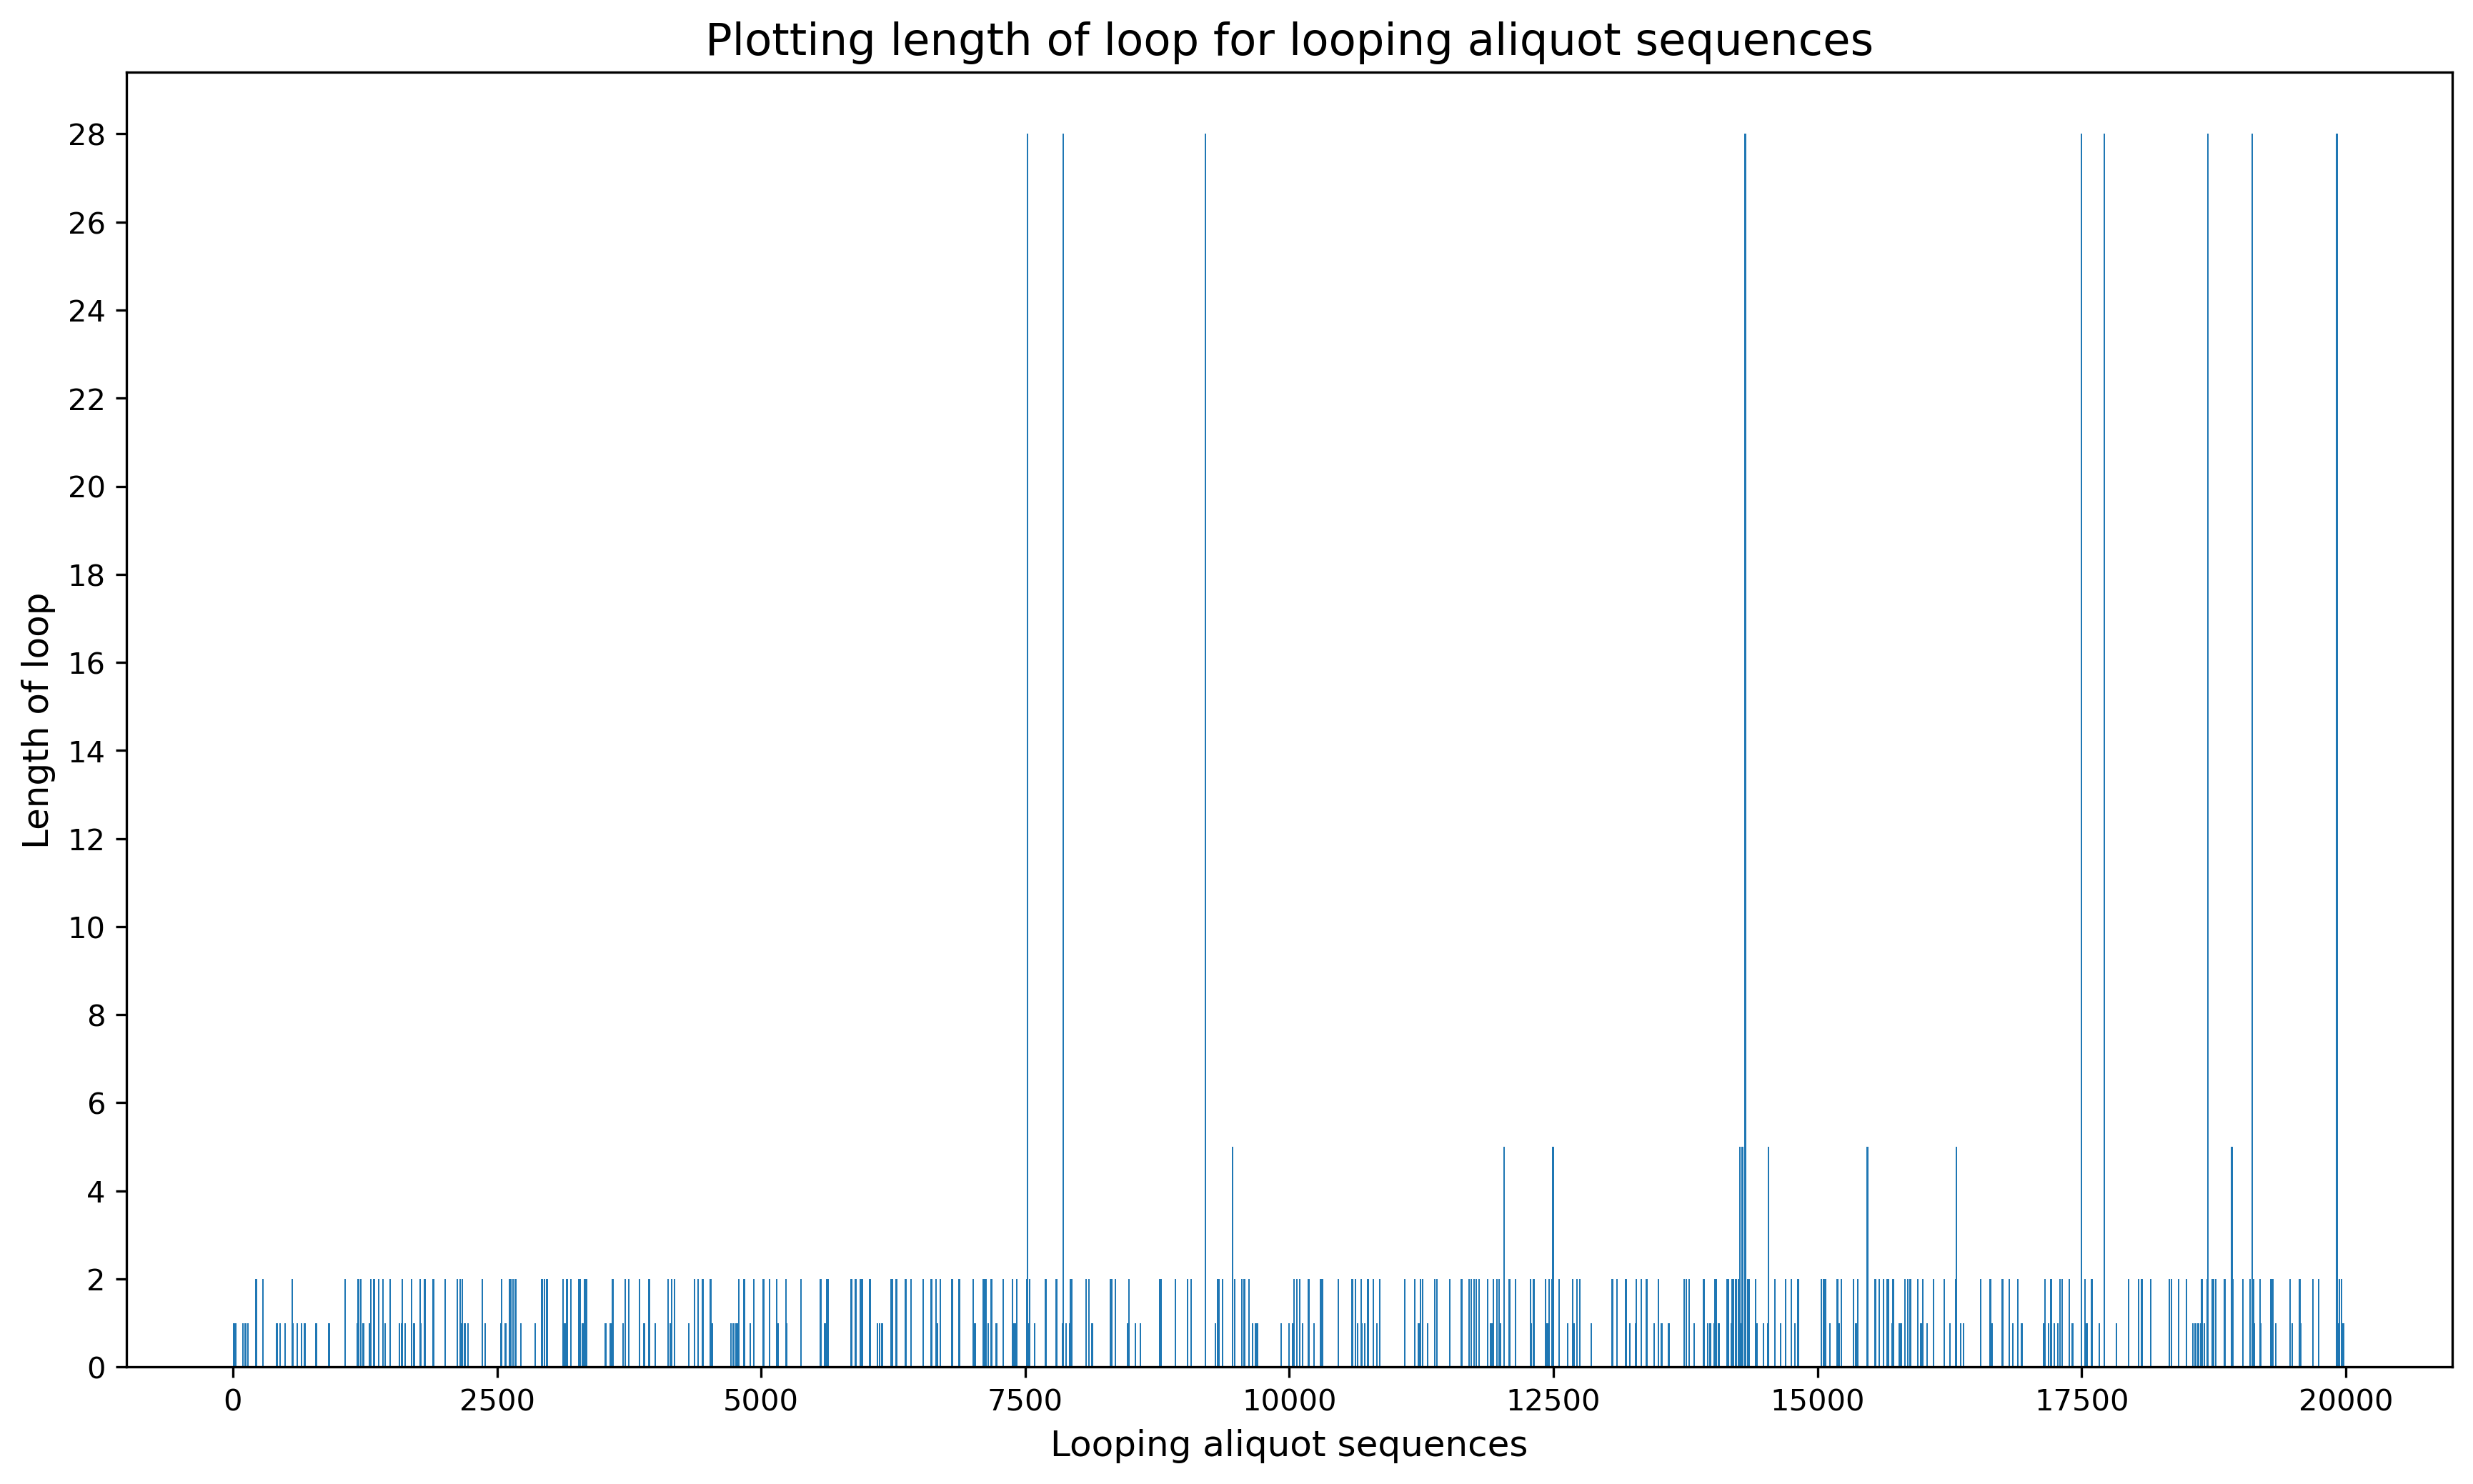

In [22]:
###WARNING: This may take a short while to run (approximately one minute)
loop_plotter(20000,30)

We can show that the loops of length 5 visible in the plot above all actually correspond to the same loop, and the same for the loops of length 28. This is made clear from the code below - if we print out all of the loops with a length longer than 2 that are shown in the graph, you can see that the loops of length 5 and the loops of length 28 are all the same:

In [23]:
loops = number_tester_fast(20000,60)[1]        #This is all of the loops less than 200000 (second group of our classified sequences were the loops)
for i in loops:
    length = loop_length(i, show_loop=True)
    if length[0]>2:                            #Print the loop if it has length greater than 2
        print("\nLoop in the aliquot sequence of " + str(i) + ": ")
        print(length[1])


Loop in the aliquot sequence of 2856: 
[376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760]

Loop in the aliquot sequence of 3360: 
[376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760]

Loop in the aliquot sequence of 5784: 
[376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760]

Loop in the aliquot sequence of 5916: 
[14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19

From our results above, we conclude that there is no limit on the length of a loop in an Aliquot sequence.

# 2. If a sequence terminates at zero, how long can it be (relative to the starting $n$)?

We will attempt to find a relation between the length of a terminating sequence and the starting $n$.
To begin, we plot the lengths of terminating sequences for $n<20000$.

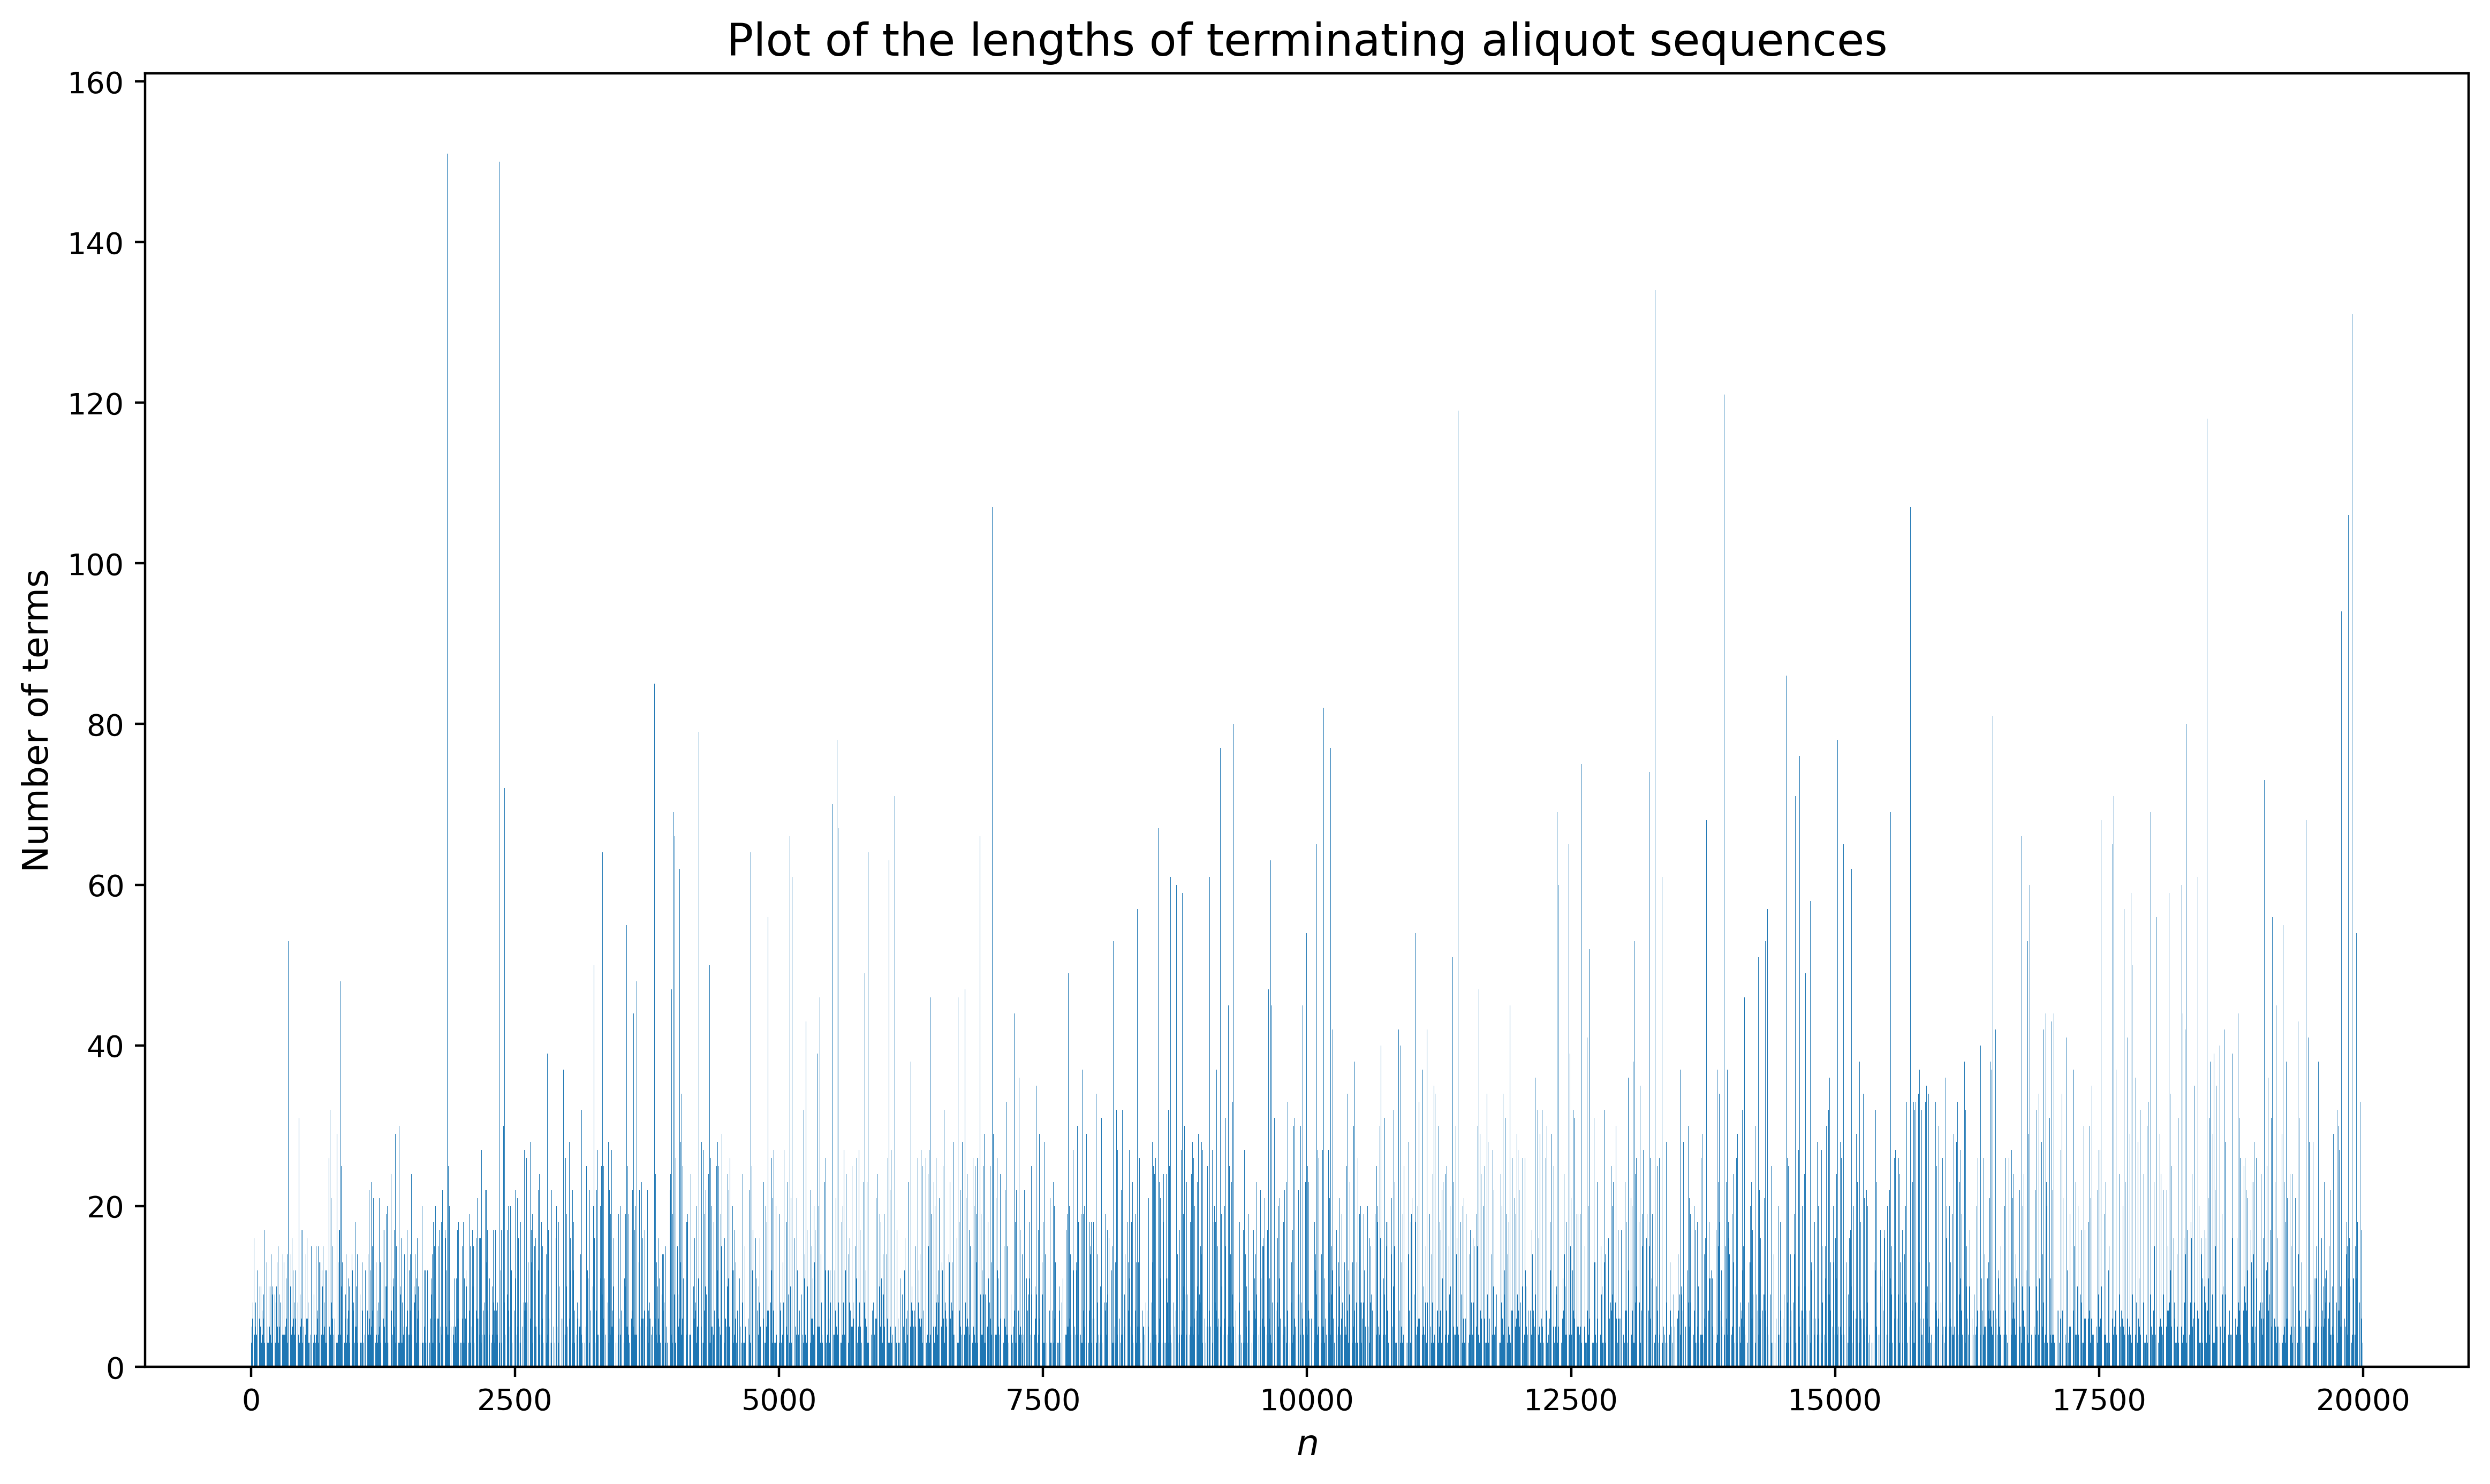

In [24]:
###WARNING: This may take a short while to run (approximately one minute)

#We plot the lengths of all the terminating aliquot sequences (in the range 0 to k).

k = 20000
t = 200                                                                              #Number of terms to check

x_values = (number_tester_fast(k,t))[0]                                              #Takes the first group from the number_tester_fast function (the sequences classified as ending in zero)
terms = {i:len(aliquot_calculator_fast(i,t,sequence_only=True)) for i in x_values}   #Creates a dictionary of starting n: sequence length
y_values = [terms[i] for i in x_values]                                              #List of lengths of each of these terminating aliquot sequences

plt.figure(figsize=(14,8),dpi=400)                                                   #Plotting
plt.xlabel('$n$',fontsize=12)
plt.ylabel('Number of terms',fontsize=12)
y_lim = max(y_values) + 10
plt.ylim([0,y_lim])
plt.title('Plot of the lengths of terminating aliquot sequences',fontsize=15)
plt.bar(x_values,y_values)
plt.show()

Using the plot above, we can see that most sequences terminating in zero terminate in under 30 terms. We also can see that most sequences seem to fall into one of three groups in terms of how many steps they take to terminate - they terminate before 30 terms, at around 70 terms, or after a much larger amount of terms (eg. 150). This is interesting as it means that a sequence with a larger starting $n$ does not necessarily take more steps to reach zero. Relative to the starting $n$ there seems to be no observable pattern between the size of $n$ and the number of terms till it gets to zero.

Therefore, using the plot we can conclude that there is no clear relation between the length of a terminating sequence and a starting $n$, although we can note that sequences that begin with prime numbers always have 3 terms. 

It is clear that the vast majority of sequences terminate in less than 31 terms. We explore this further by plotting histograms of the lengths of terminating sequences for the first 5000 terms, the first 10,000 terms, the first 15,000 terms, and all 20,000 terms.

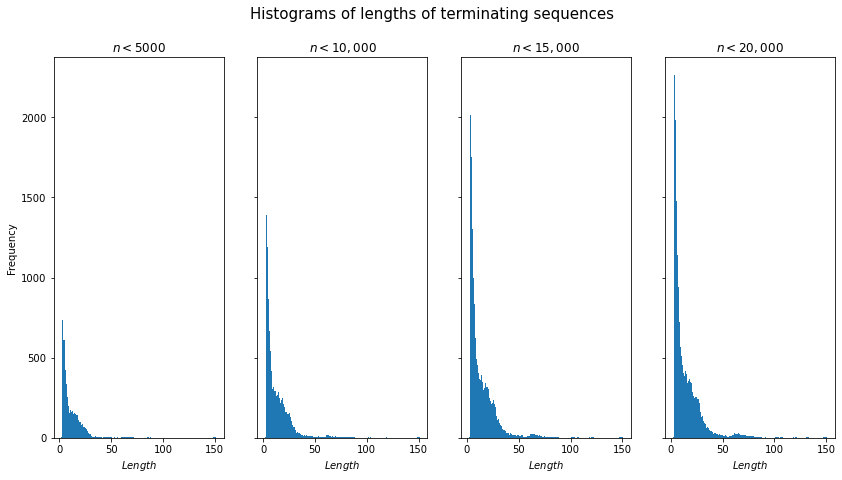

96.14 % of all sequences with starting n<5000 terminate in less than 31 terms
93.65 % of all sequences with starting n<10,000 terminate in less than 31 terms
92.13 % of all sequences with starting n<15,000 terminate in less than 31 terms
91.72 % of all sequences with starting n<20,000 terminate in less than 31 terms


In [25]:
#We plot histograms of the lengths of terminating aliquot sequences.

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(14, 7),sharey=True)
fig.suptitle('Histograms of lengths of terminating sequences', fontsize=15)

counts1, bins1, bars1 = ax1.hist(y_values[:5000], bins = 150)
ax1.set_title("$n<5000$")

counts2, bins2, bars2 = ax2.hist(y_values[:10000], bins = 150)
ax2.set_title("$n<10,000$")

counts3, bins3, bars3 = ax3.hist(y_values[:15000], bins = 150)
ax3.set_title("$n<15,000$")

counts4, bins4, bars4 = ax4.hist(y_values, bins = 150)
ax4.set_title("$n<20,000$")

ax1.set_xlabel('$Length$')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('$Length$')
ax3.set_xlabel('$Length$')
ax4.set_xlabel('$Length$')

plt.show()

#Calculating Percentages and rounding to 2 dp
print(str(round(100*sum(counts1[:29])/sum(counts1),2))+" % of all sequences with starting n<5000 terminate in less than 31 terms")
print(str(round(100*sum(counts2[:29])/sum(counts2),2))+" % of all sequences with starting n<10,000 terminate in less than 31 terms")
print(str(round(100*sum(counts3[:29])/sum(counts3),2))+" % of all sequences with starting n<15,000 terminate in less than 31 terms")
print(str(round(100*sum(counts4[:29])/sum(counts4),2))+" % of all sequences with starting n<20,000 terminate in less than 31 terms")

The difference between the percentage of sequences that terminate in fewer than 31 terms decreases as we increase the number of sequences tested. We conclude by hypothesizing that approximately 90% of all terminating sequences terminate in fewer than 31 terms.

Now, using histograms, we compare the lengths of terminating sequences that begin with odd numbers to those that begin with even numbers.

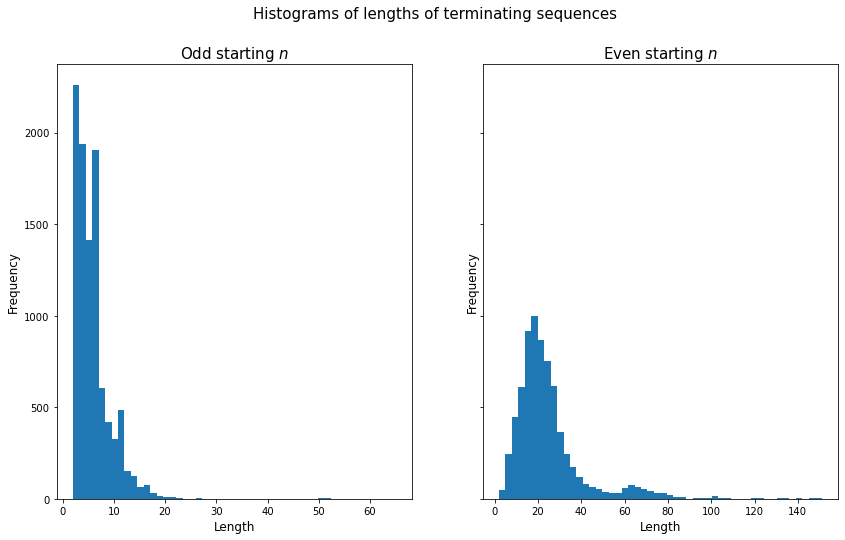

Number of terminating sequences with odd starting n: 9858
Number of terminating sequences with even starting n: 7176


In [26]:
#We plot histograms of the lengths of the terminating aliquot sequences for those that begin with odd numbers and those that begin with even numbers.

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 8),sharey=True)
fig.suptitle('Histograms of lengths of terminating sequences', fontsize = 15)

x_values_odd = [i for i in x_values if i%2 != 0]            #List of odd starting n 
y_values_odd = [terms[i] for i in x_values_odd]             #Obtaining lengths from the terms dictionary


x_values_even = [i for i in x_values if i%2 == 0]           #List of even starting n 
y_values_even = [terms[i] for i in x_values_even]           #Obtaining lengths from the terms dictionary


ax1.set_xlabel('Length',fontsize=12)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_title('Odd starting $n$',fontsize=15)
#ax1.set_ylim([0,y_lim])
#ax1.bar(x_values_odd,y_values_odd)
ax1.hist(y_values_odd, bins = 50)

ax2.set_xlabel('Length',fontsize=12)
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_title('Even starting $n$',fontsize=15)
#ax2.set_ylim([0,y_lim])
#ax2.bar(x_values_even,y_values_even)
ax2.hist(y_values_even, bins = 50)

plt.show()
print("Number of terminating sequences with odd starting n: " + str(len(x_values_odd)))
print("Number of terminating sequences with even starting n: " + str(len(x_values_even)))

We can clearly see that for odd n, lots of sequences terminate in less than 10 terms, and most terminate in less than 20. For even n, the distribution is much more spread out. Based on the histograms above we hypothesise that sequences beginning with an odd number terminate faster than those that begin with an even number. Finally, we note that it appears there are more odd sequences that terminate within 200 terms - which agrees with our hypothesis that odd sequences terminate faster. 

# 3. Visualising loops.

First we define a function that will plot an aliquot sequence for a given k (starting number) and t (number of terms). This will allow us to visualise aliquot sequences, including ones that contain loops.

In [27]:
def plotter(k, t, title="Aliquot Sequence"):
    '''This function plots t terms of the aliquot sequence of a given k'''
    y_values = aliquot_calculator_fast(k,t,sequence_only=True)  #Input the values of an aliquot sequence
    x_values = [i for i in range(len(y_values))]                #Generate x-values from length of the sequence
    plt.figure(figsize=(7,4))
    plt.xlabel('j (step number)', fontsize = 12)
    plt.ylabel('$s^{j}(k)$', fontsize = 12)
    plt.title(title, fontsize=15)
    plt.plot(x_values,y_values)
    plt.show()
    
def plotter_widget(k, t):
    '''This function plots t terms of the aliquot sequence of a given k'''
    y_values = aliquot_calculator_fast(k,t,sequence_only=True)  #Input the values of an aliquot sequence
    x_values = [i for i in range(len(y_values))]                #Generate x-values from length of the sequence
    plt.figure(figsize=(14,8))
    plt.xlabel('j (step number)', fontsize = 12)
    plt.ylabel('$s^{j}(k)$', fontsize = 12)
    plt.title( "Aliquot Sequence", fontsize = 15)
    plt.plot(x_values,y_values)
    plt.show()

We can now plot aliquot sequences - using the widget below you can explore the aliquot sequences starting from any number in the range 0 to 200.

In [28]:
k1 = widgets.IntSlider(value = 10, description="Starting n", max = 200)
t1 = widgets.IntSlider(value = 10, description="Terms", max = 60, min = 30)
widgets.interactive(plotter_widget,k = k1, t=t1)

interactive(children=(IntSlider(value=10, description='Starting n', max=200), IntSlider(value=30, description=…

Now let's use it to plot some loops in order to visualise them nicely.

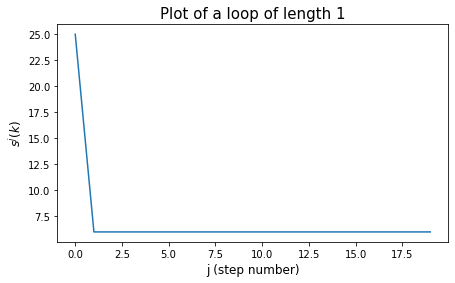

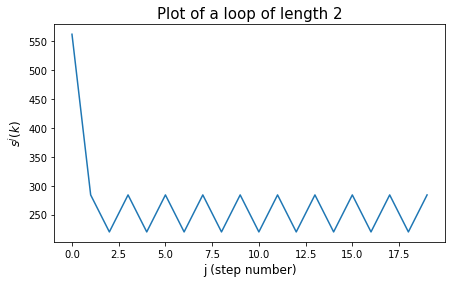

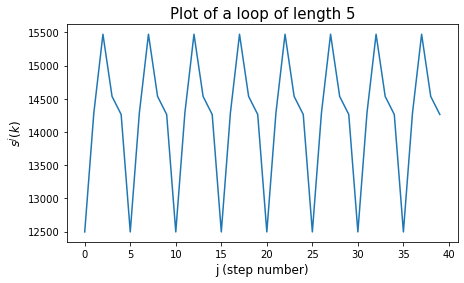

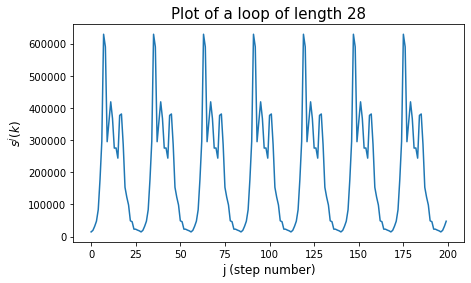

In [29]:
plotter(25,20,'Plot of a loop of length 1')        #This is a plot of an aliquot sequence which has a loop of length 1
plotter(562,20,'Plot of a loop of length 2')       #This is a plot of an aliquot sequence which has a loop of length 2
plotter(12496,40,'Plot of a loop of length 5')   #This is a plot of an aliquot sequence which has a loop of length 5 that we found in extra question 1
plotter(14316,200,'Plot of a loop of length 28') #This is a plot of an aliquot sequence which has a loop of length 28 that we found in extra question 1

# 4. Comparing the number of ‘abundant’ numbers (where $s(n) > n$) to the number of ‘deficient’ numbers (where $s(n) < n$) up to a fixed value $n$.

First, we wrote a function in order to compare the number of abundant and deficient numbers up to a fixed $n$.

In [30]:
 def abundant_or_deficient(n): 
    """This function returns the number of abundant, deficient, and perfect numbers in the set of numbers up to and including n. """
    abundant = 0
    deficient = 0
    perfect = 0
    for i in range(1,n+1):
        s = sum_of_divisors_fast(i)                 #Calculating the sum of divisors for each i in range(1,n+1)
        if s<i:
            deficient+=1                            #If s(i)<i, i is deficient
        elif s>i:
            abundant+=1                             #If s(i)>i, i is abundant 
        else:
            perfect+=1                              #If s(i)=i, i is perfect
    return [abundant, deficient, perfect]

def abundant_deficient_plotter(n):                                            
    """This function plots the ratio of abundant to deficient numbers in the set of numbers up to and including n."""
    x_values = [i for i in range(1, n+1)]                               #x values are all the numbers in the range 1 to n
    y_values = []                                   
    for i in range(1,n+1):
        data = abundant_or_deficient(i)
        y_values.append(data[0]/data[1])                                #y values are (no. abundant / no. deficient) in set of numbers 1 to i
    plt.figure(figsize=(14,8), dpi=300)
    plt.xlabel('n',fontsize=12)
    plt.ylabel('Ratio',fontsize=12)
    plt.title('Plotting the ratio of abundant to deficient numbers in the set of numbers up to and including ' + str(n),fontsize=15)
    plt.plot(x_values, [0.33]*n, label="Hypothesised limit = $\\frac{1}{3}$")
    plt.plot(x_values, y_values,label="Ratio of abundant to deficient") #Plot the ratio of abundant to deficient numbers for each i from 1 to n
    plt.legend()
    plt.show()

We used a graph to display this information as it is a useful way to clearly compare the number of abundant and deficient numbers up to a fixed n and see the behaviour of the ratio as n varies.
This graph shows that as n gets large, the ratio of abundant to deficient numbers tends to $\frac{1}{3}$.
We hypothesize that there are around 3 times as many deficient numbers as there are abundant numbers, for large n.

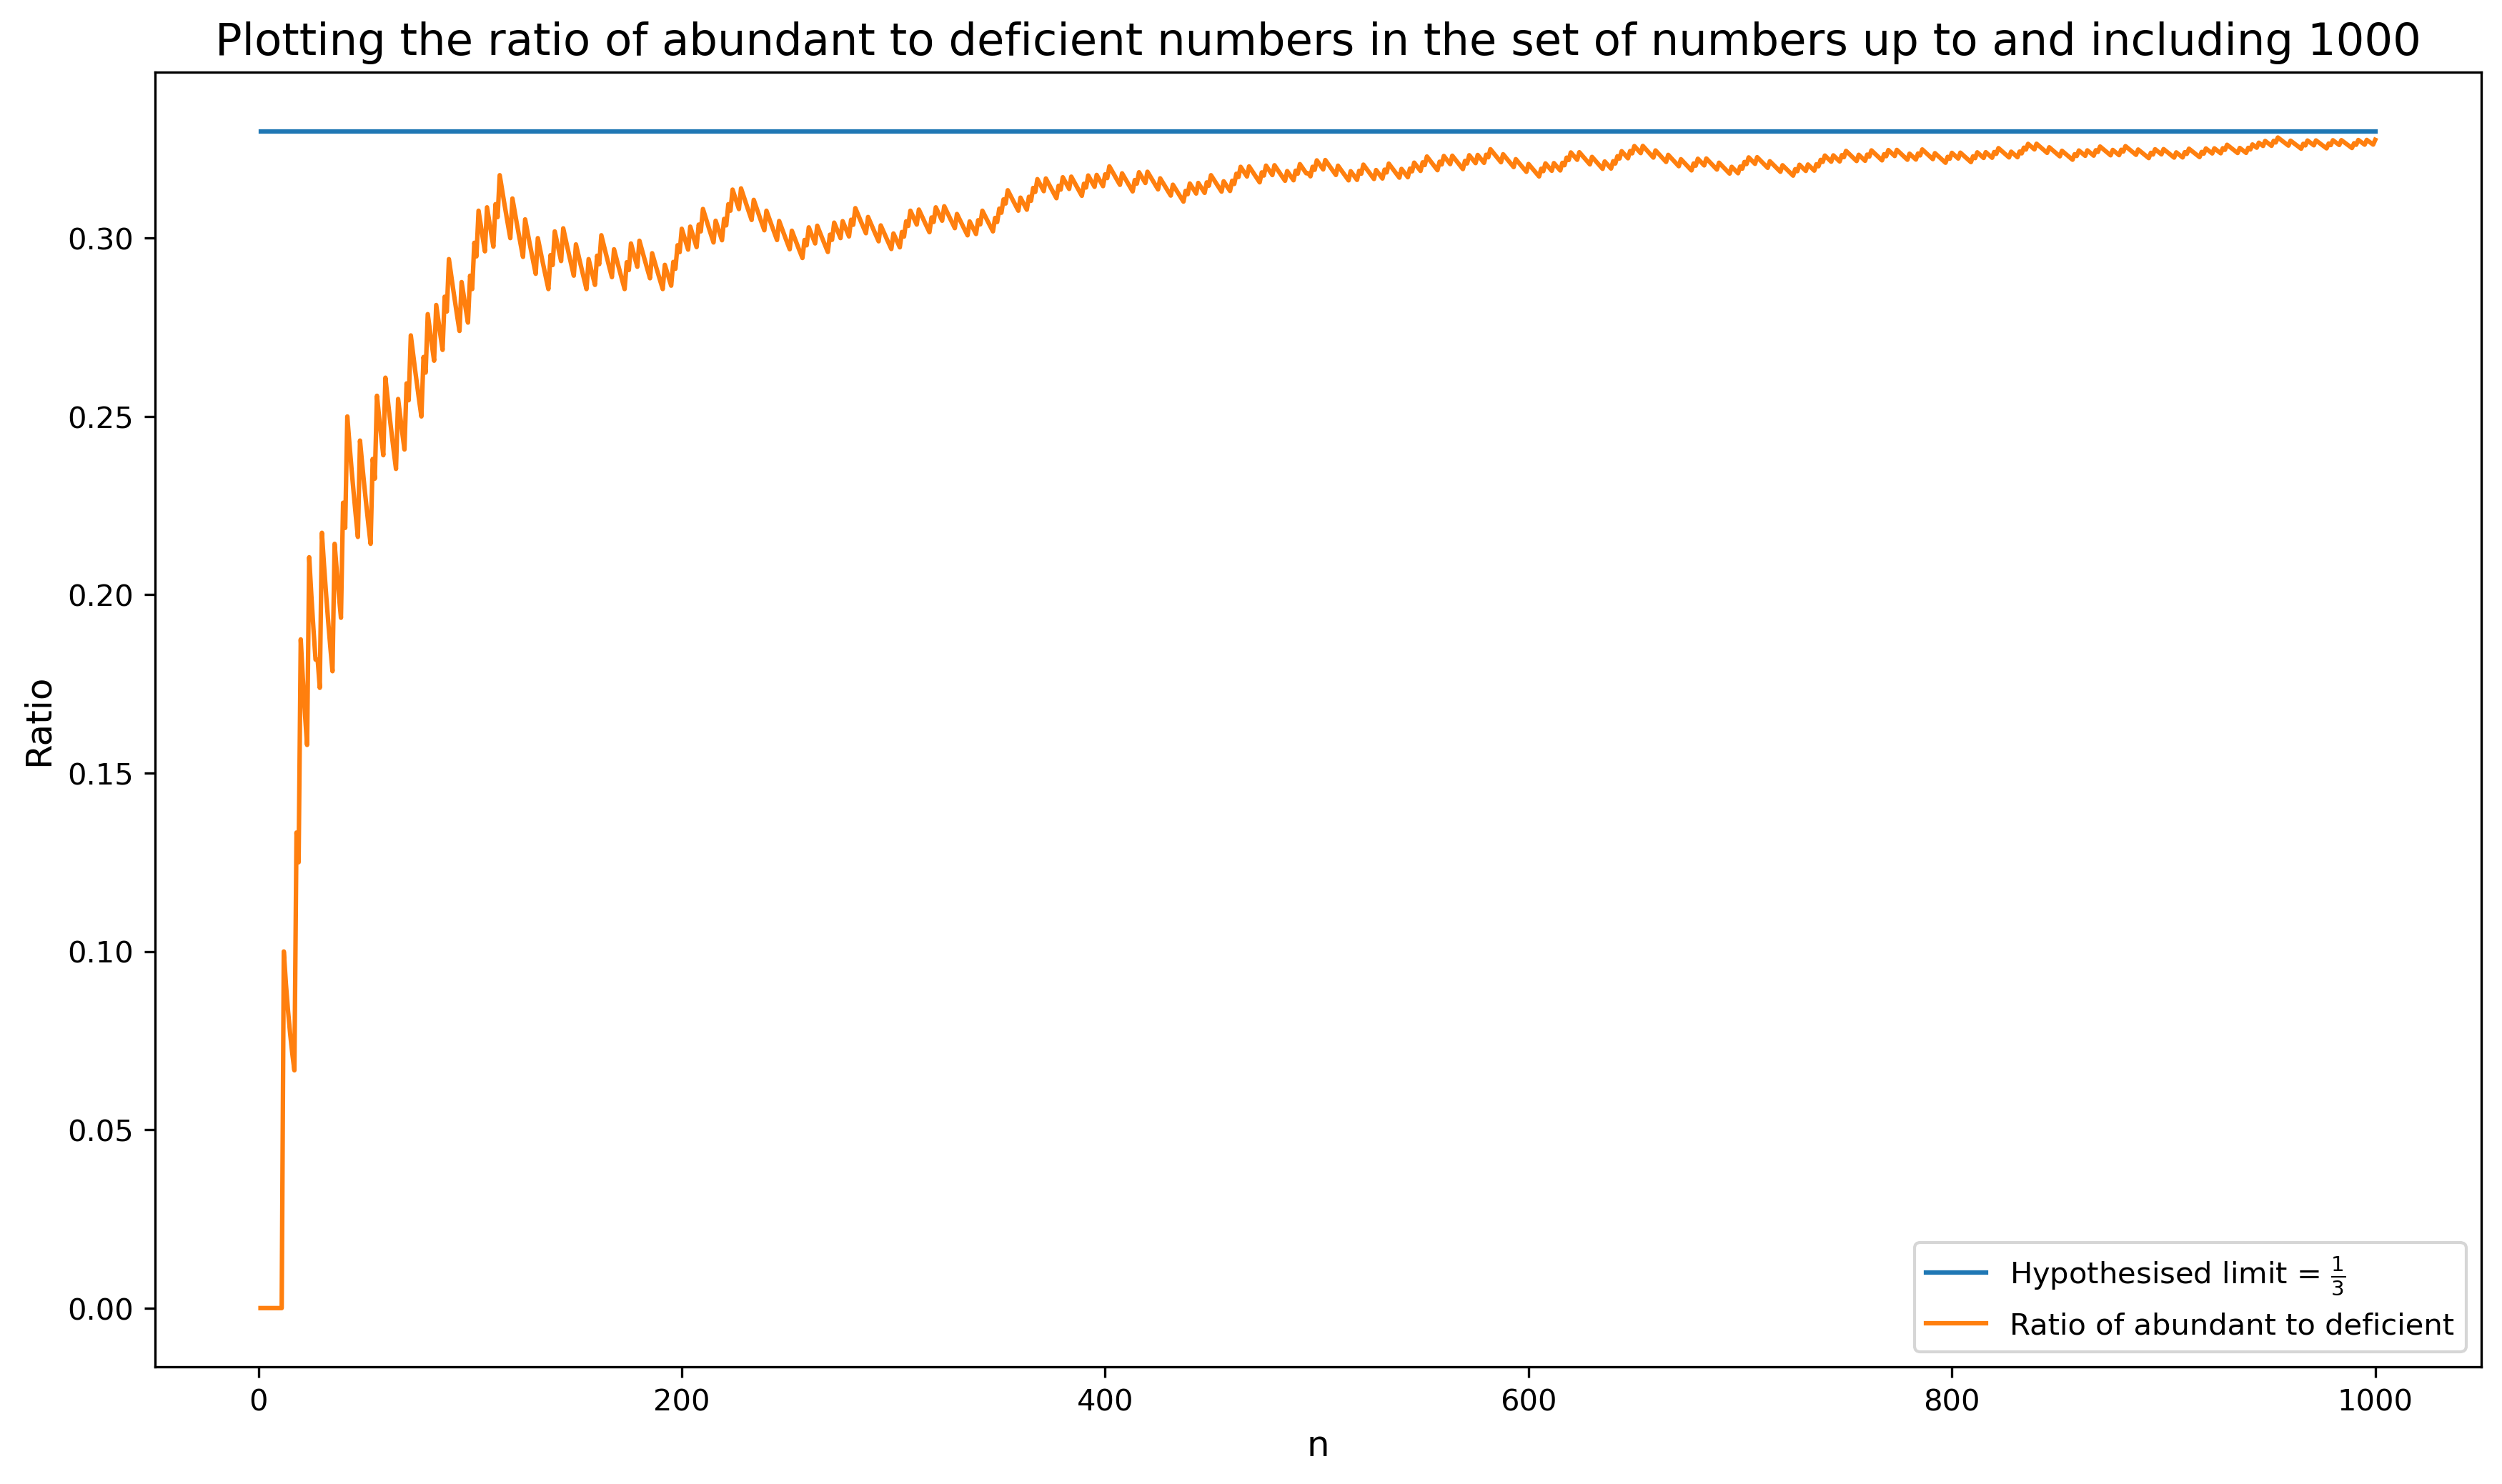

In [31]:
abundant_deficient_plotter(1000)

# 5. Analysing the preimage $s^{-1}(\{n\})$.

We begin by calculating $s(n)$ for $n \leq 10^3$ to explore the preimage for small $n$.

In [32]:
def proper_factor_list(n):
    """This produces a list of divisors of n using the prime decomposition dictionary."""
    n = decompose(n)                                 #Prime decomposition of n.
    divisors=[1]                                     #Initializing divisor list with 1
    for p in n.keys():
        p_div=[p**i for i in range(1,n[p]+1)]        #List of divisors of p^n.
        newdivisors=[]                               #Empty list to store new divisors
        for pp in p_div:                             #For each divisor we already have, multiply by each power of p to get new ones.
            newdivisors+=[pp*i for i in divisors]
        divisors+=newdivisors                        #Updating the list of divisors
    return divisors[:-1]

upper_limit=  10**3                                         #Setting upper limit
proper_factors = dict()                                     #Dictionary that stores proper factors
proper_factor_sums = dict()                                 #Dictionary that stores sums of proper factors

for i in range(0,upper_limit+1):
    proper_factors[i]= proper_factor_list(i)                #Adding entries to the dictionaries
    proper_factor_sums[i]= sum(proper_factors[i])

preimage = dict()                                           #Dictionary that stores the preimage of a sum

for i in proper_factor_sums.keys():                         #Creating a dictionary for the preimage
    s = proper_factor_sums[i]
    if s in preimage:
        preimage[s].append(i)                               #If s is in the preimage dictionary, append i to the list
    else:
        preimage[s] = [i]                                   #Create a new entry s:[i] in the dictionary

sorted_sums = sorted(preimage.keys())                       #Sorting the dictionary by ascending order of keys. 
temp_preimage = {i:preimage[i] for i in sorted_sums}        
preimage = temp_preimage        

print("A sample of maximum value of the preimages in the form (n):(max possible value of pre-image of n)")
for i in list(preimage.keys())[:30]:
    print(str(i)+" : "+str(max(preimage[i])))

A sample of maximum value of the preimages in the form (n):(max possible value of pre-image of n)
0 : 1
1 : 997
3 : 4
4 : 9
6 : 25
7 : 8
8 : 49
9 : 15
10 : 14
11 : 21
12 : 121
13 : 35
14 : 169
15 : 33
16 : 26
17 : 55
18 : 289
19 : 77
20 : 361
21 : 91
22 : 38
23 : 85
24 : 529
25 : 143
26 : 46
27 : 133
28 : 28
29 : 187
30 : 841
31 : 221


We have printed a sample of values with their maximum possible preimage above. Note that no maximum preimage is printed for 2 or 5 given that there is no possible preimage for either of these values.

From the results above it seems to be the case that $s^{-1}(n)$ is bounded above by $(n-1)^2$. We hypothesise that this statement is true for $1 < n < 10^6$ below by testing the preimages for the first $10^6$ numbers. We exclude 1 from our hypothesis as $s^{-1}(1)$ is the set of prime numbers.

We start by computing the preimages for up to $n = 10^6$.

In [33]:
upper_limit=  10**6                                         #Setting upper limit
proper_factors = dict()                                     #Dictionary that stores proper factors
proper_factor_sums = dict()                                 #Dictionary that stores sums of proper factors

for i in range(0,upper_limit+1):
    proper_factors[i]= proper_factor_list(i)                #Adding entries to the dictionaries
    proper_factor_sums[i]= sum(proper_factors[i])

preimage = dict()                                           #Dictionary that stores the preimage of a sum

for i in proper_factor_sums.keys():                         #Adding entries to the dictionary
    s = proper_factor_sums[i]
    if s in preimage:
        preimage[s].append(i)                               #If s is in the preimage dictionary, append i to the list
    else:
        preimage[s] = [i]                                   #Create a new entry s:[i] in the dictionary
        
sorted_sums = sorted(preimage.keys())                       #Sorting the dictionary by ascending order of keys. 
temp_preimage = {i:preimage[i] for i in sorted_sums}        
preimage = temp_preimage

The following code will check whether our hypothesis holds for each number we have calculated a largest possible preimage value for.

In [34]:
hypothesis_holds = True                                     #Flag for hypothesis testing
for s in preimage.keys():                                   #Adding entries to the dictionary
    i = max(preimage[s])
    if s>1 and i > (s-1)**2:                                #Hypothesis test
        hypothesis_holds = False
        print("Hypothesis does not hold for "+str(s)+" : "+str(i))
if hypothesis_holds:
    print("The hypothesis holds.")
else:
    print("The hypothesis does not hold.") 

The hypothesis holds.


We now plot the largest possible preimages for each $n$, in order to visualise our hypothesis.

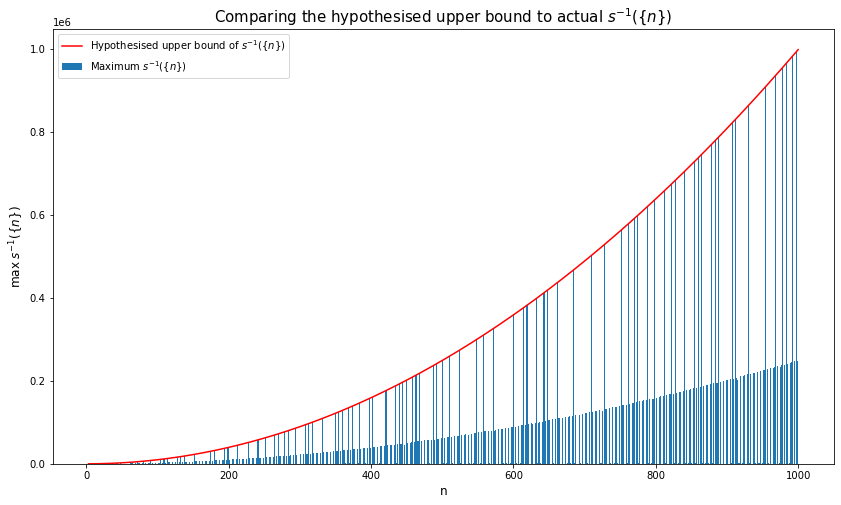

In [35]:
x_values = np.array(list(preimage.keys())[2:1001])          #Plotting of results.
x_values = np.array([i for i in list(preimage.keys()) if i <=1000 and i >1])
y_values = [(preimage[i])[-1] for i in x_values]
plt.figure(figsize=(14,8))
plt.bar(x_values,y_values, label="Maximum $s^{-1}(\{n\})$")
plt.plot(x_values,(x_values-1)**2,'r', label="Hypothesised upper bound of $s^{-1}(\{n\})$")
plt.xlabel('n',fontsize=12)
plt.ylabel('max $s^{-1}(\{n\})$',fontsize=12)
plt.title('Comparing the hypothesised upper bound to actual $s^{-1}(\{n\})$',fontsize=15)
plt.legend()

plt.show()

We have limited the range of our graph to $n \leq 10^3$ to avoid potential missed values, as we have not computed values of $s(n)$ for $n > 10^6$. The data supports our hypothesis in this range. Also, research[$^{[2]}$](#References) we found states that for $n>1$, $$|s^{-1}(\{n\})| < \infty$$ $$ \forall x\in s^{-1}(\{n\}),  x<n^2 $$ which also supports our hypothesis.

Using the widget below you can explore the pre-image for different values of $n < 10^3$ - we used this in our testing in order to formulate the hypothesis.

In [36]:
def preimage_widget(n):
    if n in preimage:
        print("Preimage of "+str(n)+" = {"+', '.join(map(str,preimage[n]))+"}")
    else:
        print("Preimage of "+str(n)+" = {}")
    
k2 = widgets.IntSlider(value = 10, description="Starting n", max = 1000)
widgets.interactive(preimage_widget, n=k2)

interactive(children=(IntSlider(value=10, description='Starting n', max=1000), Output()), _dom_classes=('widge…

# 6. Investigating further optimisations (Sieve of Eratosthenes)

We felt it might be possible to further improve the efficiency of our program by investigating alternative methods for factorising large integers. We chose to implement a method utilising the Sieve of Eratosthenes to eliminate checking of non-prime factors, and hopefully speed up computation.

The Sieve of Eratosthenes identifies primes by eliminating all multiples of previous primes. To find all primes less than some $n \in \mathbb{N}$, we iterate through all integers {$2,....,n$} and remove every multiple of said integer less than $n$, thus leaving behind a set of prime numbers. 

In [37]:
def sieve(n):
    """Uses a Sieve of Eratosthenes to output a list of all primes less than or equal to n (for a positive integer n)"""
    numbers = [j for j in range(n + 1)]       #List of numbers starting at 0
    numbers[0] = None                         #We change the value of the number to None if it is composite
    numbers[1] = None
    for i in range(n + 1):
        if not numbers[i] == None:            #If i is composite we do not need to check its multiples
            for q in range(2, (n) // i + 1):  #Find all multiples of i less than n
                numbers[q * i] = None         #Numbers has all composites changed to None
    primes = []                               
    for i in range(n + 1):                    #Store all prime values found in a separate list
        if not numbers[i] == None:  
            primes.append(i)
    return primes

def isprime_sieve(n):
    """Checks if n is prime using the Sieve of Eratosthenes."""
    return n in sieve(n)

def decompose_sieve(N):
    '''This function returns the prime decomposition of a positive integer N.'''
    current_N = N                                          #Define a variable containing N that can be modified
    current_decomp = {}                                    #Define a dictionary to write primes and their indices to
    p = 2
    while (current_N > 1):                                 #Check that N has not been fully factorised yet
        if ((isprime_sieve(p)) and (current_N % p == 0)):  #Checks if p divides N and whether p is prime.
            e = 0                                          #Exponent counter - we reset the power of the current p to 0
            while (current_N % p == 0):                    #If N is not fully factorised yet, divides N by p and increases the power by one.
                current_N = current_N // p                 
                e += 1
            current_decomp[p] = e                          #Save p and its power in a dictionary.
        p += 1
    return current_decomp

def smallest_factor(n):
    """Returns the smallest factor of a positive integer n."""
    sqrt=n**0.5
    i=2
    while i<=sqrt:                              #Checks all integers less that sqrt(n)
        if n%i==0:
            return i                            #If we find an i that divides n, return i as the value.
        i+=1                                    #Otherwise add one to i and try again
    return n  

In our testing, we found our implementation of methods using the Sieve of Eratosthenes to be slower in every test (than the decompose function that we used before). This may have been due to inefficient implementation of the algorithm involved, as the degree to which it was slower was incredibly high. We felt our initial method was adequately fast, and so ultimately we chose not to use the new function. Examples of testing for both large and small integers is demonstrated below.

In [38]:
#TESTING FOR LARGE INTEGERS

N = 996052951

#Time test for the original decompose function
start0 = time.time()
decompose(N)
print("Original decompose function took %ss" % (time.time() - start0))

#Time test for the Sieve of Eratosthenes
start1 = time.time()
decompose_sieve(N)
print("Sieve of Eratosthenes took %ss" % (time.time() - start1))

Original decompose function took 0.0005083084106445312s
Sieve of Eratosthenes took 3.284541130065918s


In [39]:
#TESTING OVER A RANGE OF SMALLER INTEGERS

N = 100000

#Time test for the original decompose function
start0 = time.time()
for i in range(N):
    decompose(N)
print("Original decompose function took %ss" % (time.time() - start0))

#Time test for the Sieve of Eratosthenes
start1 = time.time()  
for i in range(N):
    decompose_sieve(N)
print("Sieve of Eratosthenes took %ss" % (time.time() - start1))

Original decompose function took 0.8459665775299072s
Sieve of Eratosthenes took 1.430729627609253s


# References

[[1]](https://mathworld.wolfram.com/SociableNumbers.html) Weisstein, Eric W. "Sociable Numbers." From MathWorld--A Wolfram Web Resource. 

[[2]](https://math.dartmouth.edu/~carlp/aliquot.pdf) Pomerance, Carl. "The first function and its iterates." Connections in Discrete Mathematics: A Celebration of the Work of Ron Graham (2018): 125-138 